In [5]:
# # ==========================================================
# # NLP Text Classification with Hyperparameter Tuning
# # Dataset: Restaurant_Reviews.tsv
# # Includes: NLTK Preprocessing + GridSearchCV + AUC + Bias–Variance
# # ==========================================================

# # Step 1: Import Libraries
# import pandas as pd
# import numpy as np
# import re
# import nltk
# import seaborn as sns
# import matplotlib.pyplot as plt

# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score, f1_score,
#     roc_auc_score, roc_curve, classification_report
# )

# # ML Models
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# import xgboost as xgb
# from lightgbm import LGBMClassifier

# # NLTK Downloads
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# # Step 2: Load Dataset
# data = pd.read_csv(r'C:\nlp project\Restaurant_Reviewss\Restaurant_Reviews.tsv', delimiter ='\t', quoting = 3 )
# print("✅ Dataset Loaded Successfully")
# print(data.head())

# # Step 3: Text Preprocessing
# lemmatizer = WordNetLemmatizer()
# stop_words = set(stopwords.words('english'))

# def clean_text(text):
#     text = text.lower()
#     text = re.sub(r'[^a-z\s]', '', text)
#     tokens = nltk.word_tokenize(text)
#     tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
#     return ' '.join(tokens)

# data['Cleaned_Review'] = data['Review'].apply(clean_text)

# # Step 4: Feature Extraction (TF-IDF)
# tfidf = TfidfVectorizer(max_features=2000)
# X = tfidf.fit_transform(data['Cleaned_Review']).toarray()
# y = data['Liked']

# # Step 5: Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 6: Define Models and Hyperparameters
# param_grids = {
#     'Logistic Regression': (
#         LogisticRegression(max_iter=300),
#         {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
#     ),
#     'Naive Bayes': (
#         MultinomialNB(),
#         {'alpha': [0.1, 0.5, 1.0]}
#     ),
#     'SVM': (
#         SVC(probability=True),
#         {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
#     ),
#     'Random Forest': (
#         RandomForestClassifier(),
#         {'n_estimators': [100, 200],
#          'max_depth': [None, 10, 20]}
#     ),
#     'Decision Tree': (
#         DecisionTreeClassifier(),
#         {'max_depth': [None, 5, 10, 20],
#          'criterion': ['gini', 'entropy']}
#     ),
#     'KNN': (
#         KNeighborsClassifier(),
#         {'n_neighbors': [3, 5, 7],
#          'weights': ['uniform', 'distance']}
#     ),
#     'Gradient Boosting': (
#         GradientBoostingClassifier(),
#         {'n_estimators': [100, 200],
#          'learning_rate': [0.05, 0.1, 0.2]}
#     ),
#     'XGBoost': (
#         xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
#         {'n_estimators': [100, 200],
#          'learning_rate': [0.05, 0.1, 0.2],
#          'max_depth': [3, 5, 7]}
#     ),
#         'LightGBM': (
#         LGBMClassifier(),
#         {'n_estimators': [100, 200],
#          'learning_rate': [0.05, 0.1, 0.2],
#          'num_leaves': [31, 63, 127],
#          'max_depth': [-1, 5, 10]}
#     )

# }

# # Step 7: Train + Tune + Evaluate
# results = []
# roc_curves = {}

# for name, (model, params) in param_grids.items():
#     print(f"\n🚀 Training and tuning {name}...")
#     grid = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
#     grid.fit(X_train, y_train)
#     best_model = grid.best_estimator_

#     y_pred = best_model.predict(X_test)
#     y_train_pred = best_model.predict(X_train)

#     # ROC/AUC
#     try:
#         y_prob = best_model.predict_proba(X_test)[:, 1]
#         auc = roc_auc_score(y_test, y_prob)
#         fpr, tpr, _ = roc_curve(y_test, y_prob)
#         roc_curves[name] = (fpr, tpr)
#     except Exception:
#         auc = np.nan

#     # Metrics
#     acc = accuracy_score(y_test, y_pred)
#     prec = precision_score(y_test, y_pred)
#     rec = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     # Bias and Variance
#     train_acc = accuracy_score(y_train, y_train_pred)
#     bias = 1 - train_acc
#     variance = abs(train_acc - acc)

#     results.append({
#         'Model': name,
#         'Best Params': grid.best_params_,
#         'Train Accuracy': train_acc,
#         'Test Accuracy': acc,
#         'Precision': prec,
#         'Recall': rec,
#         'F1 Score': f1,
#         'AUC': auc,
#         'Bias': bias,
#         'Variance': variance
#     })

#     print(f"✅ {name} Done!")
#     print(f"Best Params: {grid.best_params_}")
#     print(classification_report(y_test, y_pred))

# # Step 8: Model Comparison Table
# results_df = pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False)
# print("\n================ Model Comparison ================")
# print(results_df)

# # Step 9: Visualization
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Test Accuracy', y='Model', data=results_df, palette='viridis')
# plt.title('Model Accuracy Comparison After Hyperparameter Tuning')
# plt.xlabel('Accuracy')
# plt.ylabel('Models')
# plt.show()

# # Step 10: ROC Curves
# plt.figure(figsize=(8, 6))
# for name, (fpr, tpr) in roc_curves.items():
#     plt.plot(fpr, tpr, label=f"{name}")
# plt.plot([0, 1], [0, 1], 'k--')
# plt.title('ROC Curves (After Tuning)')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.show()

# # Step 11: Print Best Model
# best_model = results_df.iloc[0]
# print("\n🏆 Best Model:", best_model['Model'])
# print("✅ Accuracy:", round(best_model['Test Accuracy']*100, 2), "%")
# print("🎯 AUC:", round(best_model['AUC'], 4))
# print("⚙️ Best Parameters:", best_model['Best Params'])
# print("📉 Bias:", round(best_model['Bias'], 4))
# print("📈 Variance:", round(best_model['Variance'], 4))

# # ==========================================================
# # End of Script
# # ==========================================================


# import pickle

# # Suppose 'best_model' is your trained model
# filename = 'restaurant_review_model.pkl'

# # Save the model to disk
# with open(filename, 'wb') as file:
#     pickle.dump(best_model, file)

# print(f"💾 Model saved as {filename}")


# import pickle

# # Load the model from disk
# filename = 'restaurant_review_model.pkl'
# with open(filename, 'rb') as file:
#     loaded_model = pickle.load(file)

# print("✅ Model loaded successfully")

# # Example: predict using loaded model
# sample_review_vectorized = X_test[0].reshape(1, -1)  # assuming TF-IDF vector
# prediction = loaded_model.predict(sample_review_vectorized)
# print("Prediction:", prediction)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


✅ Dataset Loaded Successfully
                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

🚀 Training and tuning Logistic Regression...
✅ Logistic Regression Done!
Best Params: {'C': 10, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       209
           1       0.94      0.99      0.97       191

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


🚀 Training and tuning Naive Bayes...
✅ Naive Bayes Done!
Best Params: {'alpha': 0.1}
              precision    recall  f1-score   support

           0       0.95   

C:\Users\Tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [10:11:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Done!
Best Params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       209
           1       0.91      0.84      0.88       191

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400


🚀 Training and tuning LightGBM...
[LightGBM] [Info] Number of positive: 809, number of negative: 791
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505625 -> initscore=0.022501
[LightGBM] [Info] Start training from score 0.022501

C:\Users\Tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Best Params,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC,Bias,Variance
2,SVM,"{'C': 10, 'kernel': 'rbf'}",0.998800,0.975000,0.959400,0.989500,0.974200,0.997800,0.001200,0.023800
3,Random Forest,"{'max_depth': None, 'n_estimators': 100}",0.998800,0.970000,0.968600,0.968600,0.968600,0.988300,0.001200,0.028800
0,Logistic Regression,"{'C': 10, 'solver': 'lbfgs'}",0.994400,0.967500,0.945000,0.989500,0.966800,0.994300,0.005600,0.026900
4,Decision Tree,"{'criterion': 'entropy', 'max_depth': None}",0.998800,0.960000,0.939700,0.979100,0.959000,0.960800,0.001200,0.038800
5,KNN,"{'n_neighbors': 5, 'weights': 'distance'}",0.998800,0.940000,0.903400,0.979100,0.939700,0.975500,0.001200,0.058800
1,Naive Bayes,{'alpha': 0.1},0.975000,0.930000,0.913700,0.942400,0.927800,0.984200,0.025000,0.045000
6,Gradient Boosting,"{'learning_rate': 0.2, 'n_estimators': 200}",0.982500,0.920000,0.949200,0.879600,0.913000,0.979000,0.017500,0.062500
7,XGBoost,"{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}",0.960600,0.887500,0.914800,0.842900,0.877400,0.953700,0.039400,0.073100
8,LightGBM,"{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 31}",0.819400,0.757500,0.809200,0.644000,0.717200,0.831300,0.180600,0.061900



📁 Model Comparison Table saved as 'models/Model_Comparison_Table.xlsx'


C:\Users\Tarun\AppData\Local\Temp\ipykernel_12520\77521162.py:198: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test Accuracy', y='Model', data=results_df, palette='viridis')


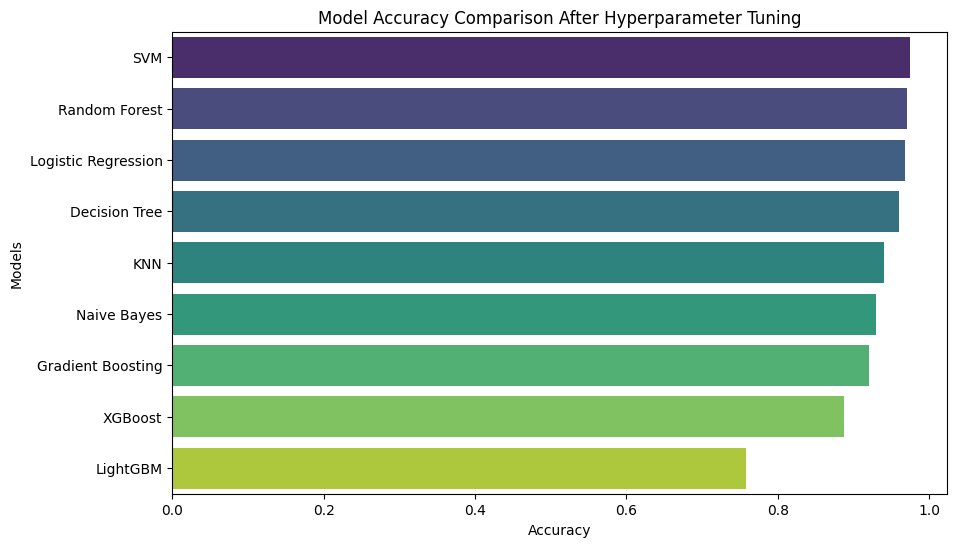

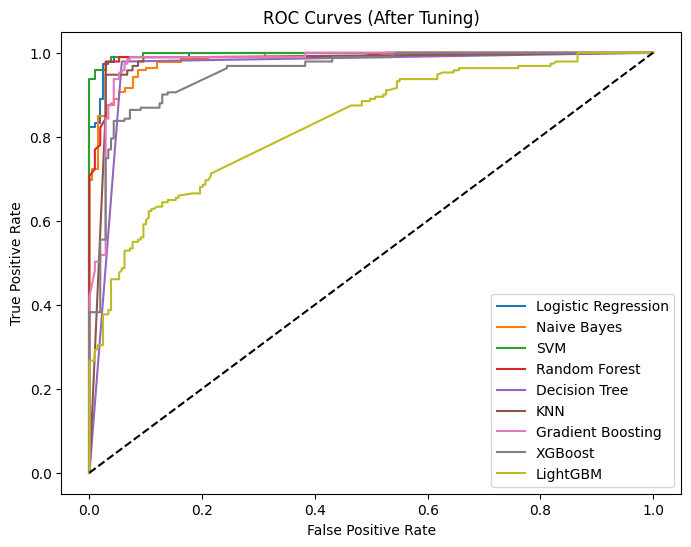


🏆 Best Model: SVM
✅ Accuracy: 97.5 %
🎯 AUC: 0.9978
⚙️ Best Parameters: {'C': 10, 'kernel': 'rbf'}
📉 Bias: 0.0012
📈 Variance: 0.0238
✅ Saved model: models\Logistic Regression.pkl
✅ Saved model: models\Naive Bayes.pkl
✅ Saved model: models\SVM.pkl
✅ Saved model: models\Random Forest.pkl
✅ Saved model: models\Decision Tree.pkl
✅ Saved model: models\KNN.pkl
✅ Saved model: models\Gradient Boosting.pkl
✅ Saved model: models\XGBoost.pkl
✅ Saved model: models\LightGBM.pkl
✅ TF-IDF vectorizer saved successfully at models/tfidf.pkl
✅ Saved metrics: metrics\SVM_metrics.pkl
✅ Saved ROC curve: roc_curves\SVM_roc.pkl
✅ Saved metrics: metrics\Random Forest_metrics.pkl
✅ Saved ROC curve: roc_curves\Random Forest_roc.pkl
✅ Saved metrics: metrics\Logistic Regression_metrics.pkl
✅ Saved ROC curve: roc_curves\Logistic Regression_roc.pkl
✅ Saved metrics: metrics\Decision Tree_metrics.pkl
✅ Saved ROC curve: roc_curves\Decision Tree_roc.pkl
✅ Saved metrics: metrics\KNN_metrics.pkl
✅ Saved ROC curve: roc_cur

In [5]:
# ==========================================================
# NLP Text Classification with Hyperparameter Tuning
# Dataset: Restaurant_Reviews.tsv
# Includes: NLTK Preprocessing + GridSearchCV + AUC + Bias–Variance
# ==========================================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier


# ------------------------------- NLTK Downloads -------------------------------
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Step 2: Load Dataset
data = pd.read_csv(r'C:\Final NLP Project\Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
print("✅ Dataset Loaded Successfully")
print(data.head())

# Step 3: Text Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

data['Cleaned_Review'] = data['Review'].apply(clean_text)

# Step 4: Feature Extraction (TF-IDF)
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(data['Cleaned_Review']).toarray()
y = data['Liked']



# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Define Models and Hyperparameters
param_grids = {
    'Logistic Regression': (
        LogisticRegression(max_iter=300),
        {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
    ),
    'Naive Bayes': (
        MultinomialNB(),
        {'alpha': [0.1, 0.5, 1.0]}
    ),
    'SVM': (
        SVC(probability=True),
        {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    ),
    'Random Forest': (
        RandomForestClassifier(),
        {'n_estimators': [100, 200],
         'max_depth': [None, 10, 20]}
    ),
    'Decision Tree': (
        DecisionTreeClassifier(),
        {'max_depth': [None, 5, 10, 20],
         'criterion': ['gini', 'entropy']}
    ),
    'KNN': (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}
    ),
    'Gradient Boosting': (
        GradientBoostingClassifier(),
        {'n_estimators': [100, 200],
         'learning_rate': [0.05, 0.1, 0.2]}
    ),
    'XGBoost': (
        xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
        {'n_estimators': [100, 200],
         'learning_rate': [0.05, 0.1, 0.2],
         'max_depth': [3, 5, 7]}
    ),
    'LightGBM': (
        LGBMClassifier(),
        {'n_estimators': [100, 200],
         'learning_rate': [0.05, 0.1, 0.2],
         'num_leaves': [31, 63, 127],
         'max_depth': [-1, 5, 10]}
    )
}

# Step 7: Train + Tune + Evaluate
results = []
roc_curves = {}
trained_models = {}  # To store trained models

for name, (model, params) in param_grids.items():
    print(f"\n🚀 Training and tuning {name}...")
    grid = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_estimator = grid.best_estimator_
    trained_models[name] = best_estimator  # Save the trained model

    y_pred = best_estimator.predict(X_test)
    y_train_pred = best_estimator.predict(X_train)

    # ROC/AUC
    try:
        y_prob = best_estimator.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_curves[name] = (fpr, tpr)
    except Exception:
        auc = np.nan

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Bias and Variance
    train_acc = accuracy_score(y_train, y_train_pred)
    bias = 1 - train_acc
    variance = abs(train_acc - acc)

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Train Accuracy': train_acc,
        'Test Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'AUC': auc,
        'Bias': bias,
        'Variance': variance
    })

    print(f"✅ {name} Done!")
    print(f"Best Params: {grid.best_params_}")
    print(classification_report(y_test, y_pred))

# Step 8: Model Comparison Table
results_df = pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False)
print("\n================ Model Comparison ================")
print(results_df)

# ==========================================================
# Step 8A: Enhanced Model Comparison Table (Pretty Display)
# ==========================================================

# Round numeric columns for better readability
numeric_cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Bias', 'Variance']
results_df[numeric_cols] = results_df[numeric_cols].round(4)

# Display as a styled DataFrame (Jupyter-friendly)
styled_table = results_df.style.background_gradient(
    subset=['Test Accuracy', 'F1 Score', 'AUC'],
    cmap='YlGn'
).set_properties(**{
    'text-align': 'center',
    'border': '1px solid black'
}).set_caption("📊 Model Performance Comparison After Hyperparameter Tuning")

display(styled_table)

# Optional: Save to Excel file for later review
results_df.to_excel("models/Model_Comparison_Table.xlsx", index=False)
print("\n📁 Model Comparison Table saved as 'models/Model_Comparison_Table.xlsx'")


# Step 9: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Test Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison After Hyperparameter Tuning')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.show()

# Step 10: ROC Curves
plt.figure(figsize=(8, 6))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves (After Tuning)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Step 11: Select and Save Best Model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]

print("\n🏆 Best Model:", best_model_name)
print("✅ Accuracy:", round(results_df.iloc[0]['Test Accuracy']*100, 2), "%")
print("🎯 AUC:", round(results_df.iloc[0]['AUC'], 4))
print("⚙️ Best Parameters:", results_df.iloc[0]['Best Params'])
print("📉 Bias:", round(results_df.iloc[0]['Bias'], 4))
print("📈 Variance:", round(results_df.iloc[0]['Variance'], 4))



import pickle
import os

# Create folders if they don't exist
os.makedirs("models", exist_ok=True)
os.makedirs("metrics", exist_ok=True)
os.makedirs("roc_curves", exist_ok=True)

# ============================
# 💾 Save Trained Models
# ============================
for name, model in trained_models.items():  # trained_models = dictionary of models
    model_path = os.path.join("models", f"{name}.pkl")
    with open(model_path, "wb") as f:
        pickle.dump(model, f)
    print(f"✅ Saved model: {model_path}")
    

# Save TF-IDF Vectorizer
os.makedirs("models", exist_ok=True)
with open(os.path.join("models", "tfidf.pkl"), "wb") as f:
    pickle.dump(tfidf, f)

print("✅ TF-IDF vectorizer saved successfully at models/tfidf.pkl")

# ============================
# 💾 Save Metrics and ROC Data
# ============================
for i, row in results_df.iterrows():
    metrics = {
        'Train Accuracy': row.get('Train Accuracy'),
        'Test Accuracy': row.get('Test Accuracy'),
        'Precision': row.get('Precision'),
        'Recall': row.get('Recall'),
        'F1 Score': row.get('F1 Score'),
        'AUC': row.get('AUC'),
        'Bias': row.get('Bias'),
        'Variance': row.get('Variance')
    }

    # Save metrics
    metrics_file = os.path.join("metrics", f"{row['Model']}_metrics.pkl")
    with open(metrics_file, "wb") as f:
        pickle.dump(metrics, f)
    print(f"✅ Saved metrics: {metrics_file}")

    # Save ROC curve data (fpr, tpr)
    if 'roc_curves' in globals() and row['Model'] in roc_curves:
        roc_file = os.path.join("roc_curves", f"{row['Model']}_roc.pkl")
        with open(roc_file, "wb") as f:
            pickle.dump(roc_curves[row['Model']], f)
        print(f"✅ Saved ROC curve: {roc_file}")
